# Phân tích gian lận thi cử 2018 (tỉnh Hà Giang) 
---

## Các bước thực hiện:
1. Thống kê điểm thi các môn thi và các khối thi
2. Thống kê số thí sinh có điểm các khối > 27 trong tỉnh và cả nước

___Thư viện:___

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import json

___Hằng số:___

In [2]:
NUM_BINS = 40
SUP_TITLE_SIZE = 30
TITLE_SIZE = 25
LABEL_SIZE = 15
HIST_PROVINCE_COLOR = '#F7C51D'
HIST_TOTAL_COLOR = '#2596BE'
HISTOGRAM_WIDTH = 30
HISTOGRAM_HEIGHT = 15
DEFAULT_PROVINCE_NAME = 'Hà Giang'
DEFAULT_RANGE = (0, 10)
DEFAULT_BINS = 40
PIE_HEIGHT = 500
PIE_WIDTH = 1500
PIE_PROVINCE_COLOR = '#ce3b44'
PIE_TOTAL_COLOR = '#5274c0'

___Load dữ liệu:___

In [3]:
with open('Dataset.json') as json_file:
    provinces = json.load(json_file)
data = {}
for province in provinces:
    data[province['province']] = pd.read_csv(province['file'])
    data[province['province']].set_index('SBD')

total_data = pd.concat(list(data.values()))
data['Cả nước'] = total_data

__Hàm bổ trợ:__

In [4]:
# Count number of values in each bin
def count_values(data, bins):
    nums = [0] * (len(bins) - 1)
    for i in range(len(bins) - 2, -1, -1):
        nums[i] = data[data >= bins[i]].count()
    for i in range(0, len(nums) - 1):
        nums[i] = nums[i] - nums[i+1]
    return nums

# Display number of value on each bar
def display_label_each_bar(histogram, values):
    for bar, value in zip(histogram.patches, values):
        height = bar.get_height()
        histogram.text(bar.get_x() + bar.get_width()/2.0, height + 4, value, ha='center')


def set_label_and_title(histogram, x_label, y_label, title):
    histogram.set_title(title, fontsize = TITLE_SIZE)
    histogram.set_xlabel(x_label, fontsize = LABEL_SIZE)
    histogram.set_ylabel(y_label, fontsize = LABEL_SIZE)


def set_data_histogram(histogram, data, color_code, bins):
    histogram.grid(axis='y')
    histogram.hist(data, bins = bins, zorder = 2, rwidth=0.85, color = color_code)
    histogram.set_xticks(bins)
    display_label_each_bar(histogram, count_values(data, bins))


def display_mean_variance(histogram, owner_name, subject_name):
    mean = round(data[owner_name][subject_name].mean(), 2)
    std = round(data[owner_name][subject_name].std(), 2)
    histogram.annotate(rf"$\mu={mean}$", (1550, 330), xycoords='axes pixels', fontsize=20)
    histogram.annotate(rf"$\sigma={std}$", (1550, 300), xycoords='axes pixels', fontsize=20)


def draw_histogram(histogram, 
                    owner_name, 
                    subject_name, 
                    color_code,                     
                    bins,
                    x_label = 'Điểm', 
                    y_label ='Số lượng'):
    set_label_and_title(histogram, x_label, y_label, title=owner_name)
    set_data_histogram(histogram, data[owner_name][subject_name], color_code, bins)
    display_mean_variance(histogram, owner_name, subject_name)

# Compare 2 histogram
def draw_histogram_compare(owner_name_1, 
                            owner_name_2, 
                            subject_name, 
                            num_bins = DEFAULT_BINS,
                            x_range = DEFAULT_RANGE,
                            color_code_1 = HIST_PROVINCE_COLOR, 
                            color_code_2 = HIST_TOTAL_COLOR,
                            x_label = 'Số lượng', 
                            y_label ='Điểm'):
    histograms, (owner_1, owner_2) = plt.subplots(2,1)
    histograms.set_figheight(HISTOGRAM_HEIGHT)
    histograms.set_figwidth(HISTOGRAM_WIDTH)
    histograms.suptitle(f"Phân bố điểm thi {subject_name}", fontsize = SUP_TITLE_SIZE, fontweight = 'bold')
    
    bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
    draw_histogram(owner_1, owner_name_1, subject_name, color_code_1, bins)
    draw_histogram(owner_2, owner_name_2, subject_name, color_code_2, bins)
    plt.show()

In [5]:
def count_exellent_students(province_name, sub_comb):
    province_data = data[province_name][sub_comb]
    total_data = data['Cả nước'][sub_comb]
    province_count = province_data[province_data >= 27].count()
    rest_count = total_data[total_data >= 27].count() - province_count
    return [province_count, rest_count]


def draw_pie_chart_compare(province_name = DEFAULT_PROVINCE_NAME, 
                            color_code_1 = PIE_PROVINCE_COLOR, 
                            color_code_2 = PIE_TOTAL_COLOR):
    labels = [province_name, 'Các tỉnh khác']
    specs = [[{'type':'domain'}] * 5]
    colors = [color_code_1, color_code_2]
    subject_combination = list(data[province_name])[-5:]
    fig = make_subplots(rows = 1, cols = 5, specs = specs, subplot_titles=subject_combination)
    for index, sub_comb in zip(range(5), subject_combination):
        values = count_exellent_students(province_name, sub_comb)
        fig.add_trace(go.Pie(labels=labels,values=values, name=sub_comb), 1, index+1)
    fig.update_traces(hoverinfo='label+percent+name', textinfo='percent', marker=dict(colors=colors))
    fig.update_layout(height=PIE_HEIGHT, width=PIE_WIDTH)
    fig = go.Figure(fig)
    fig.show()

## Phân bố điểm thi các môn thi
### Toán


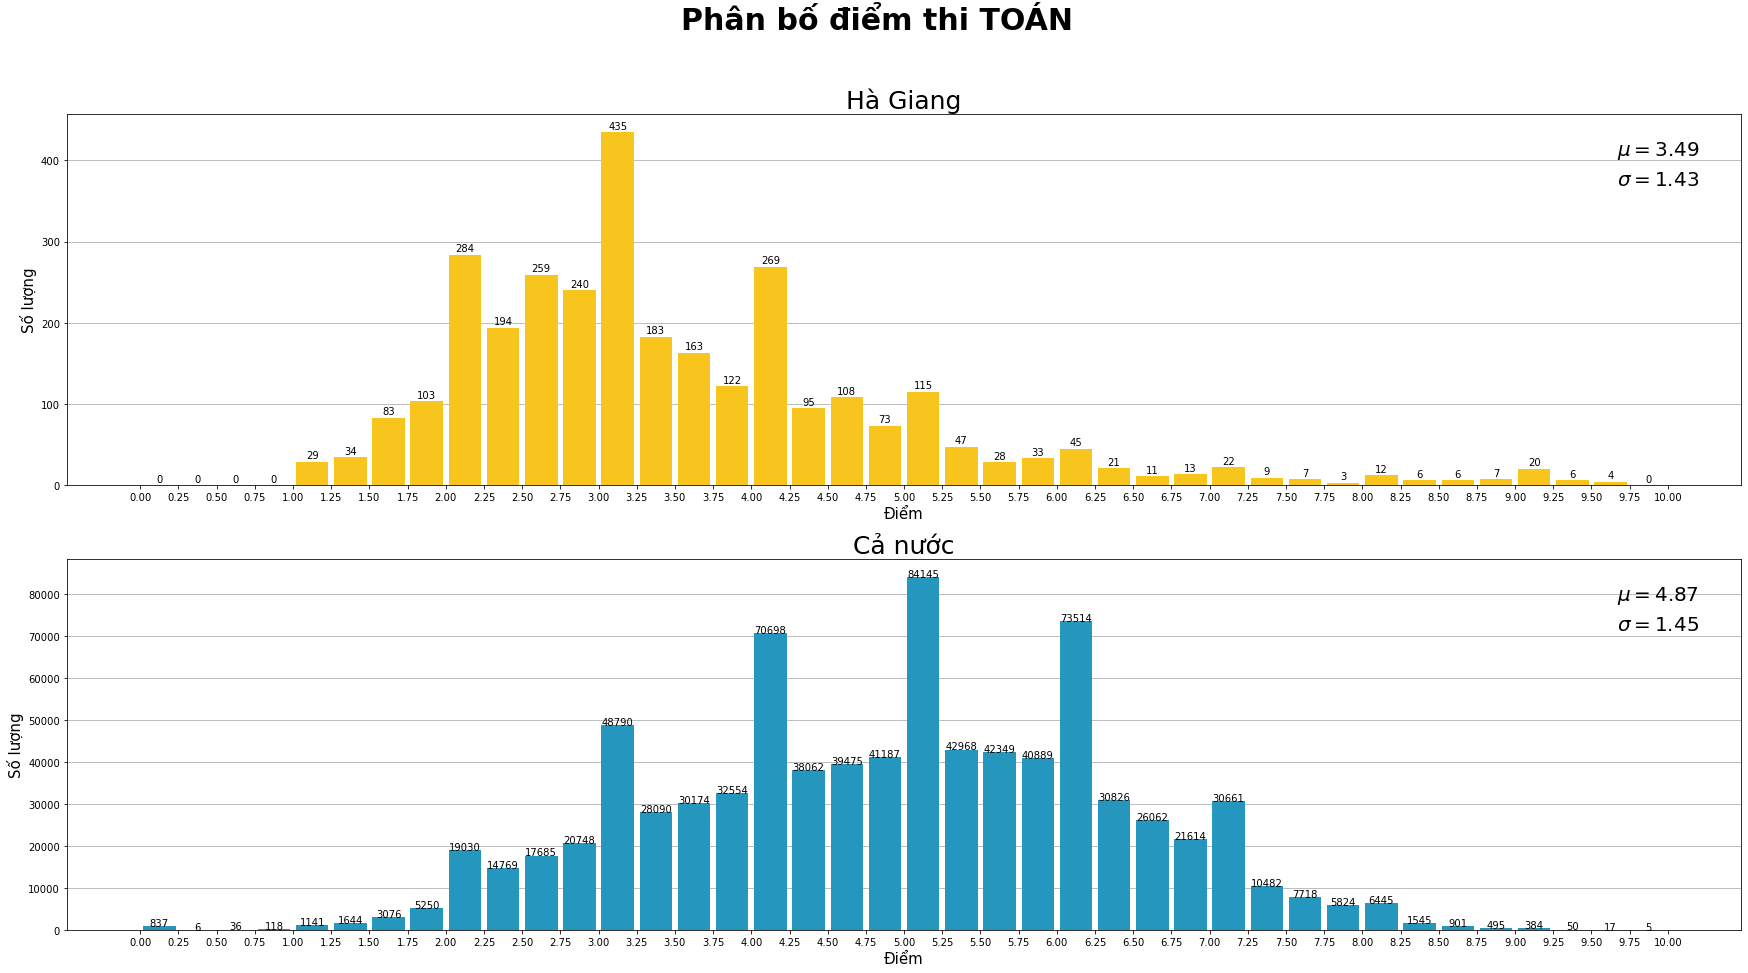

In [6]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'TOÁN')

__Nhận xét:__
- Phân bố điểm của các thí sinh của Hà Giang bị lệch trái. Chứng tỏ đa phần các học sinh Hà Giang học toán dưới trung bình.

### Ngữ văn

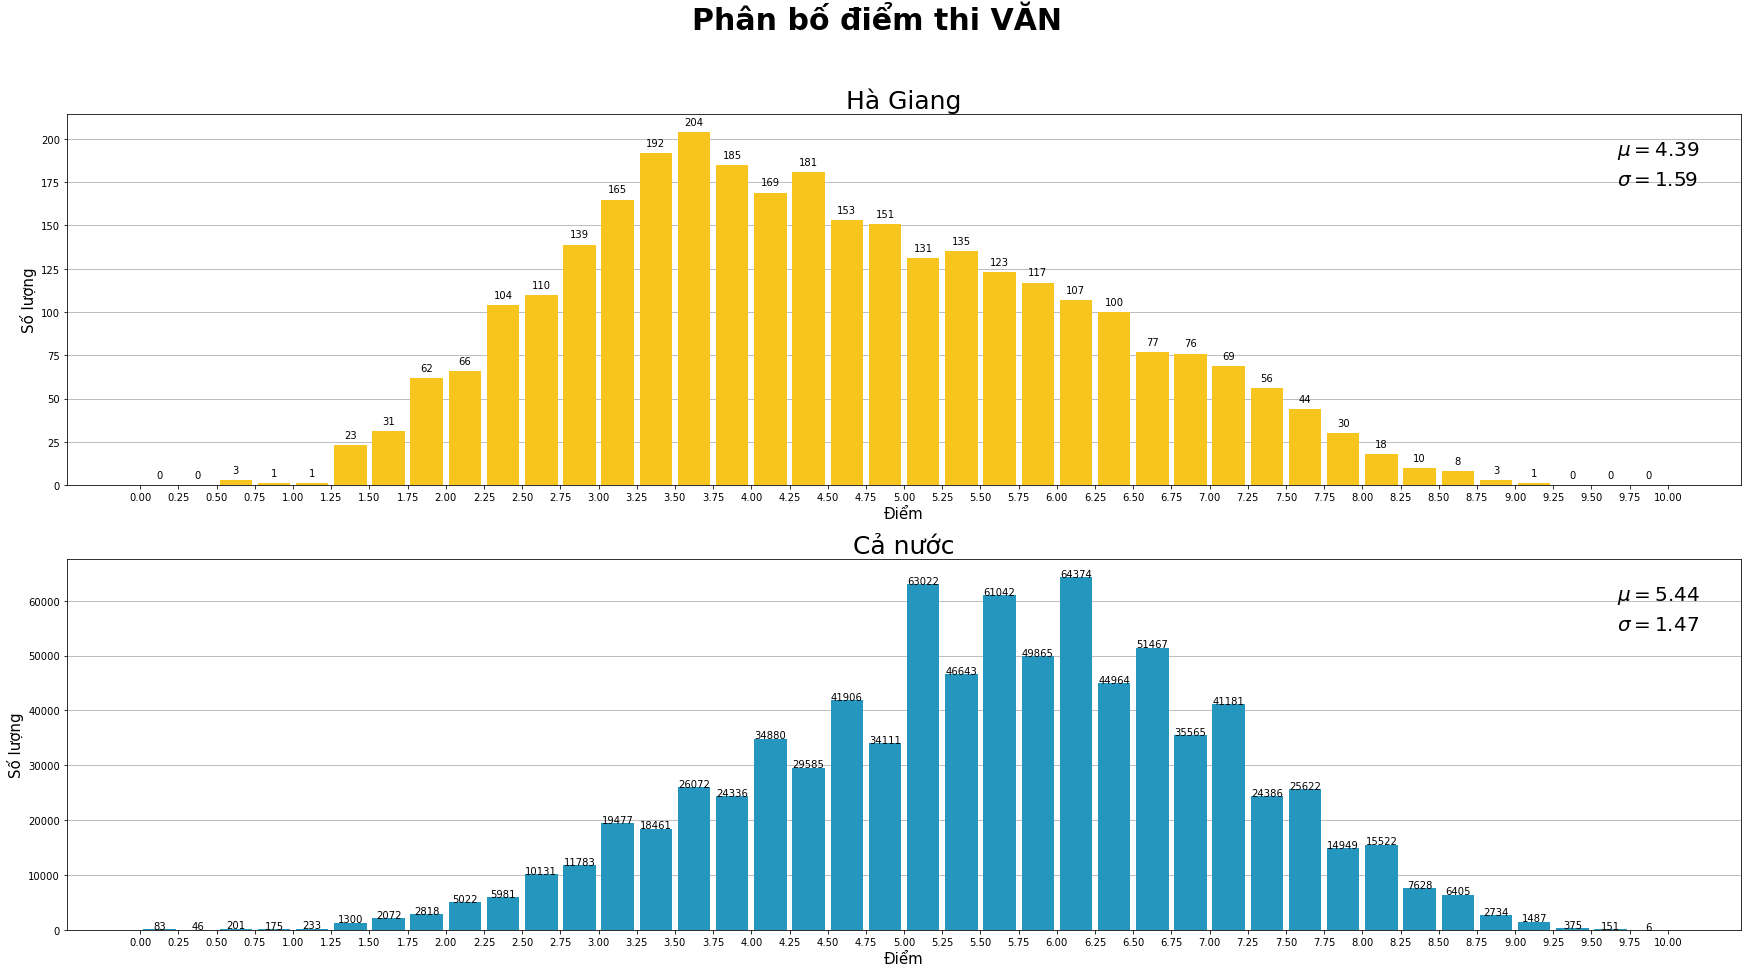

In [7]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'VĂN')

__Nhận xét:__
- Điểm trung bình của các thí sinh là 4.39 (dưới trung bình), và thấp hơn cả nước.

### Ngoại ngữ

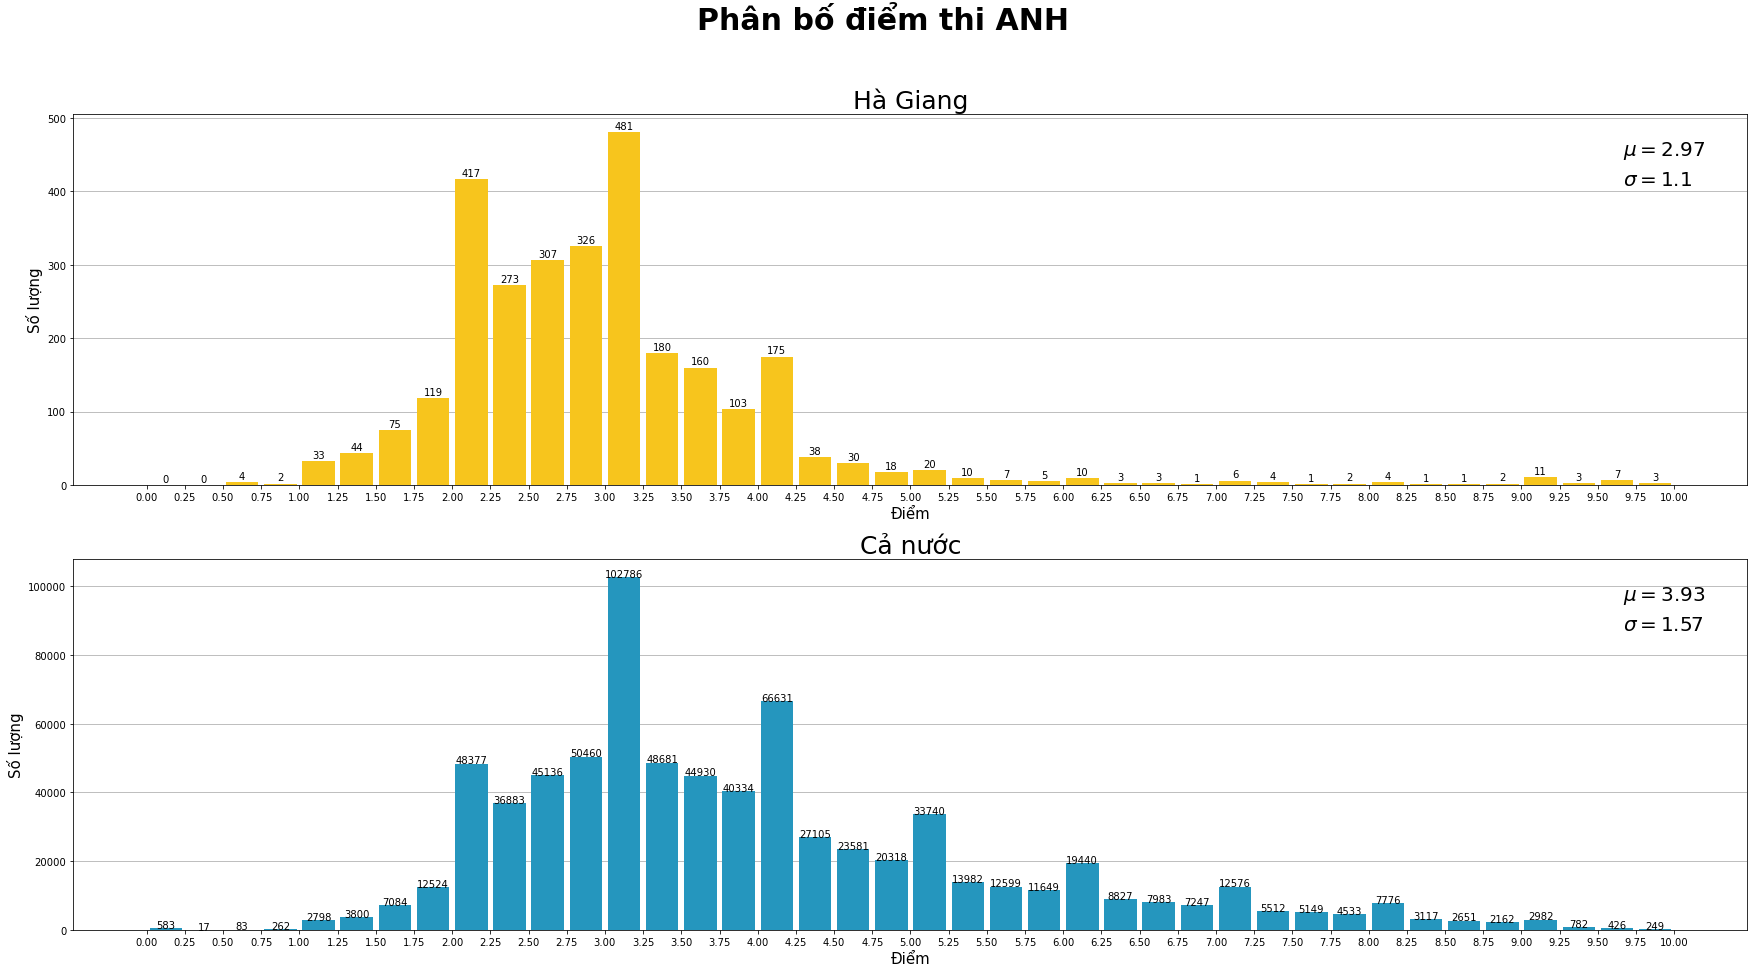

In [8]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ANH')

___Nhận xét:___
- Phân bố điểm thi môn Ngoại ngữ ở Hà Giang có nét tương đồng so với phân bố điểm thi của cả nước và không nhận thấy sự bất thường trong điểm số
- Khoảng điểm phổ biến ở môn thi này là 3 - 3.25 điểm, tương đồng so với cả nước.

### Vật lý

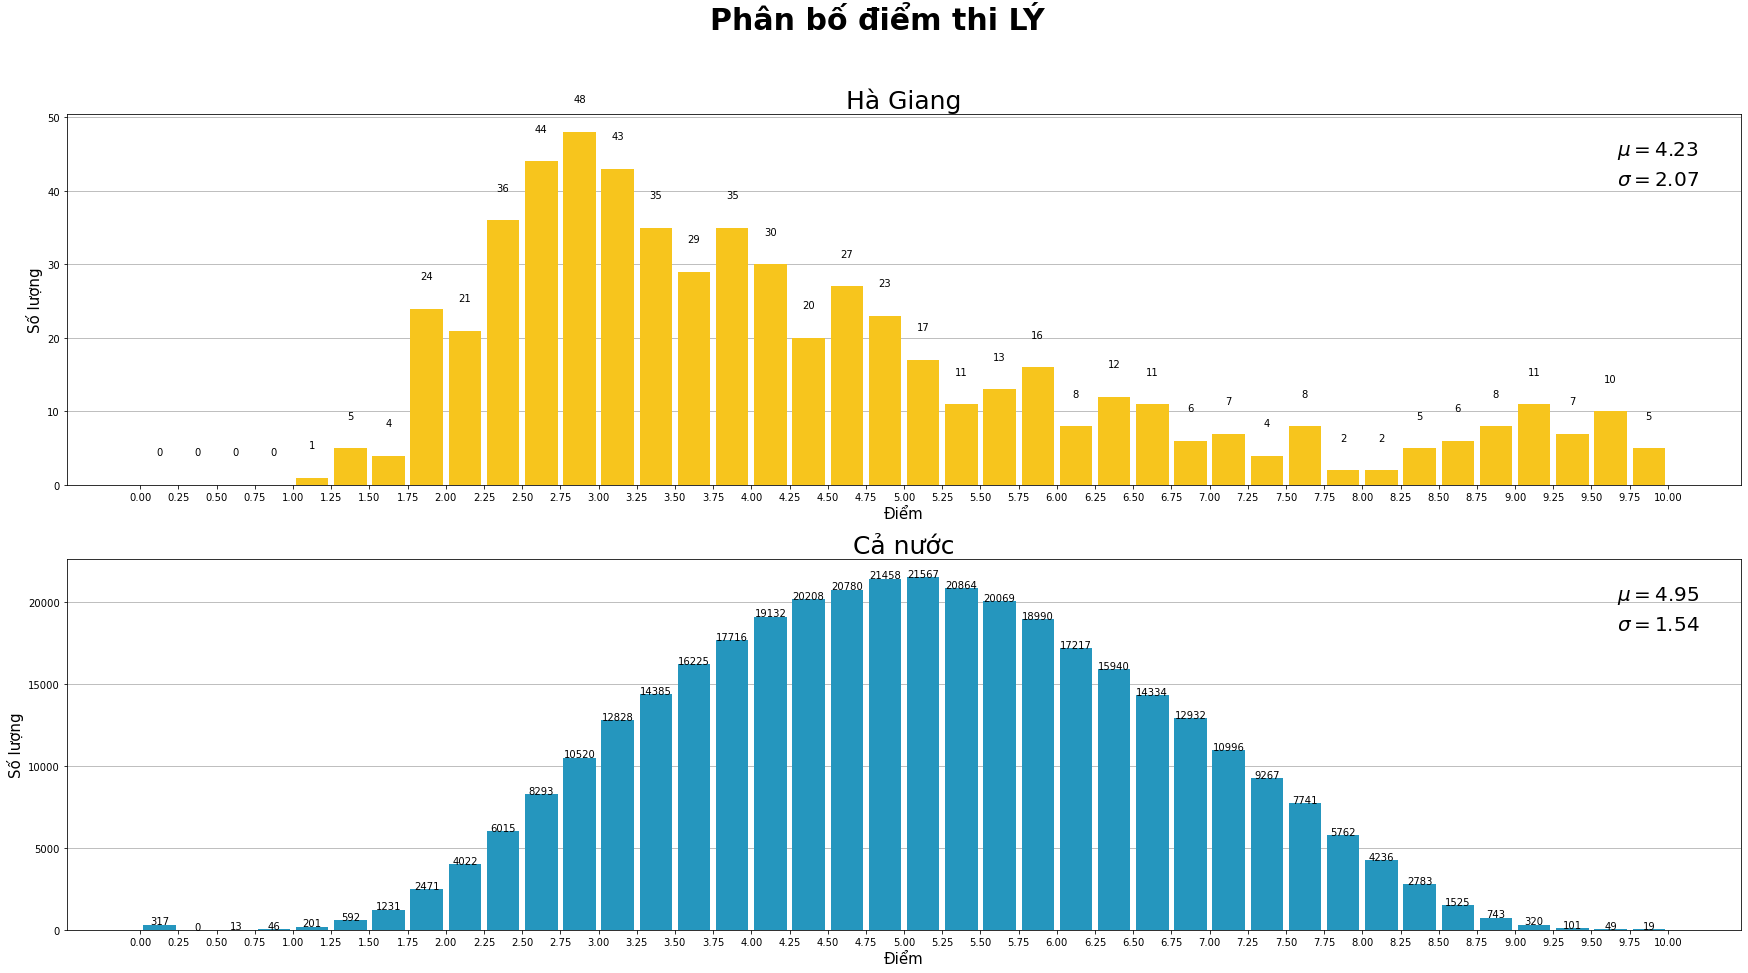

In [9]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'LÝ')

___Nhận xét:___
- Phân bố điểm thi môn Vậy lý ở Hà Giang khác biệt so với phân bố điểm thi của cả nước.
- Khoảng điểm thi phổ biến ở môn thi này là 2.5-3 điểm, thấp hơn so với cả nước (4-5 điểm).
- Số thí sinh có khoảng điểm 7.25-8.25 điểm chỉ có 4 thí sinh. Tuy nhiên số thí sinh đạt khoảng điểm 9-10 điểm lại có 33 thí sinh, cao hơn 8 lần số thí sinh có khoảng điểm thấp hơn. 
- Hơn nữa, số thí sinh đạt 9.75-10 điểm có 5 thí sinh trên tổng số 16 thí sinh của cả nước. Đây là điểm bất thường trong điểm thi môn Vật lý ở Hà Giang do khoảng điểm phổ biến thấp hơn cả nước nhưng số thí sinh đạt điểm trên 9 lại tăng cao bất thường.

### Hóa học

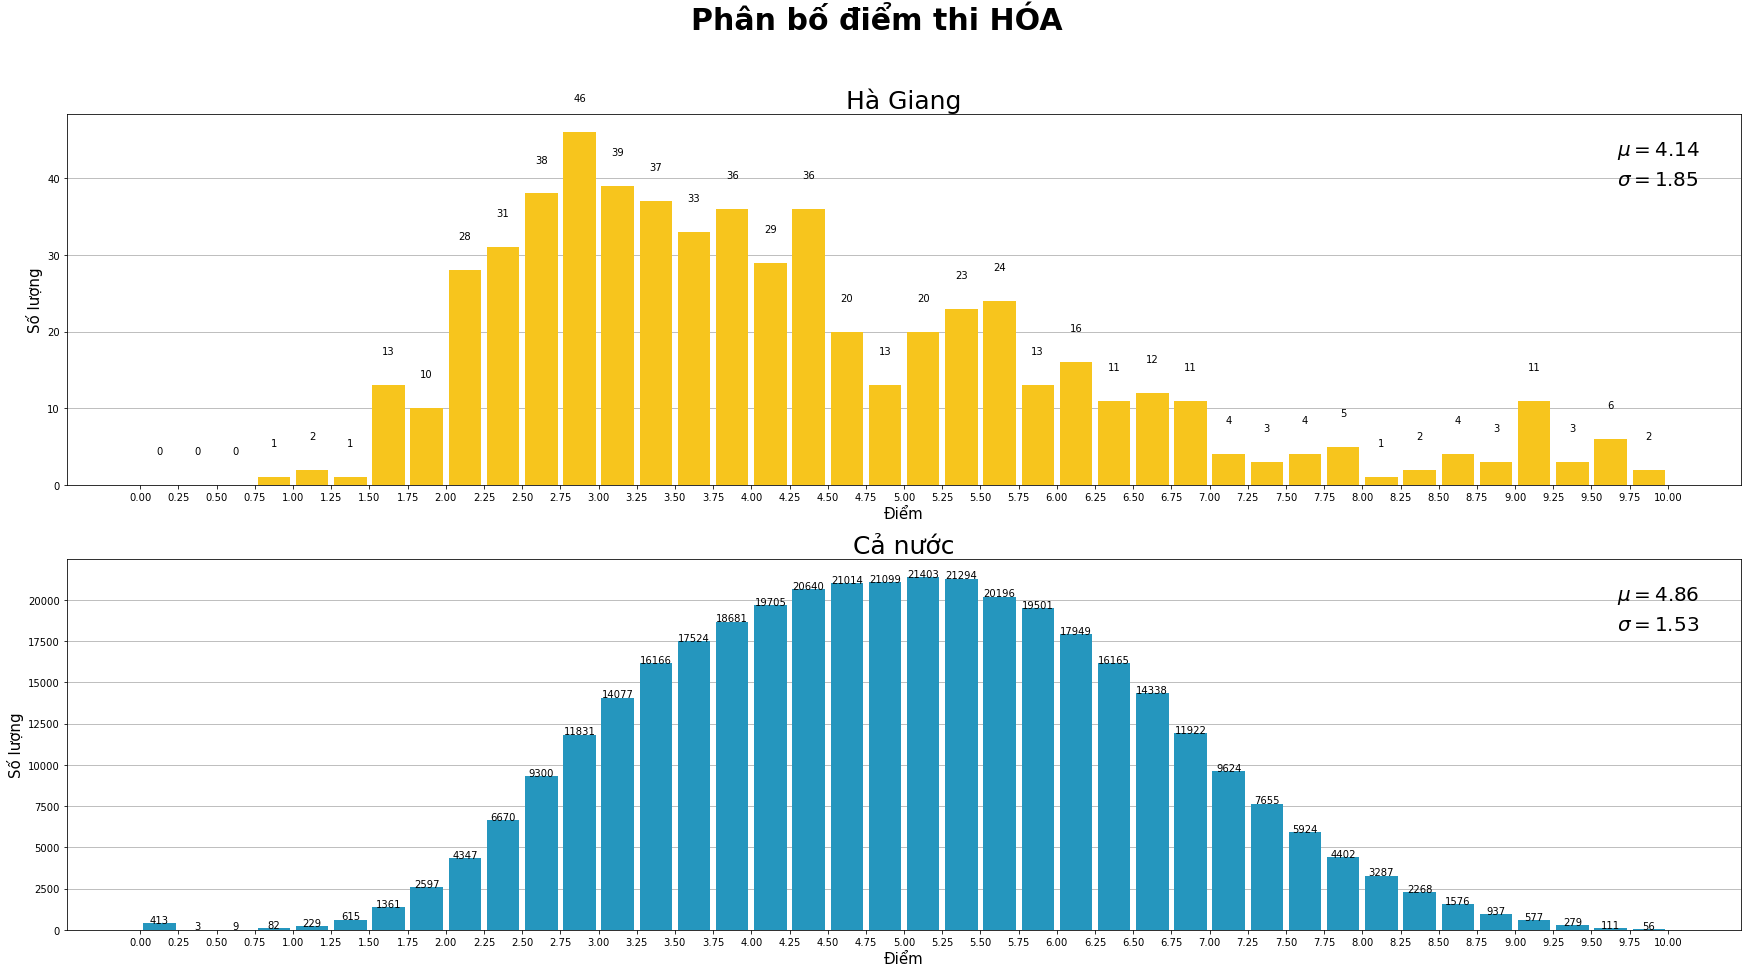

In [10]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'HÓA')

___Nhận xét:___
- Hình dáng của phổ điểm không tuân theo phân phối chuẩn và bị lệch trái so với phổ điểm toàn quốc. Trong đó, số điểm từ 9 đến 10 tăng một cách bất thường và nhiều hơn cả số điểm từ 7 đến 9. Rõ ràng đây là một dấu hiệu đáng được chú ý trong quá trình rà soát gian lận thi cử.

### Sinh học

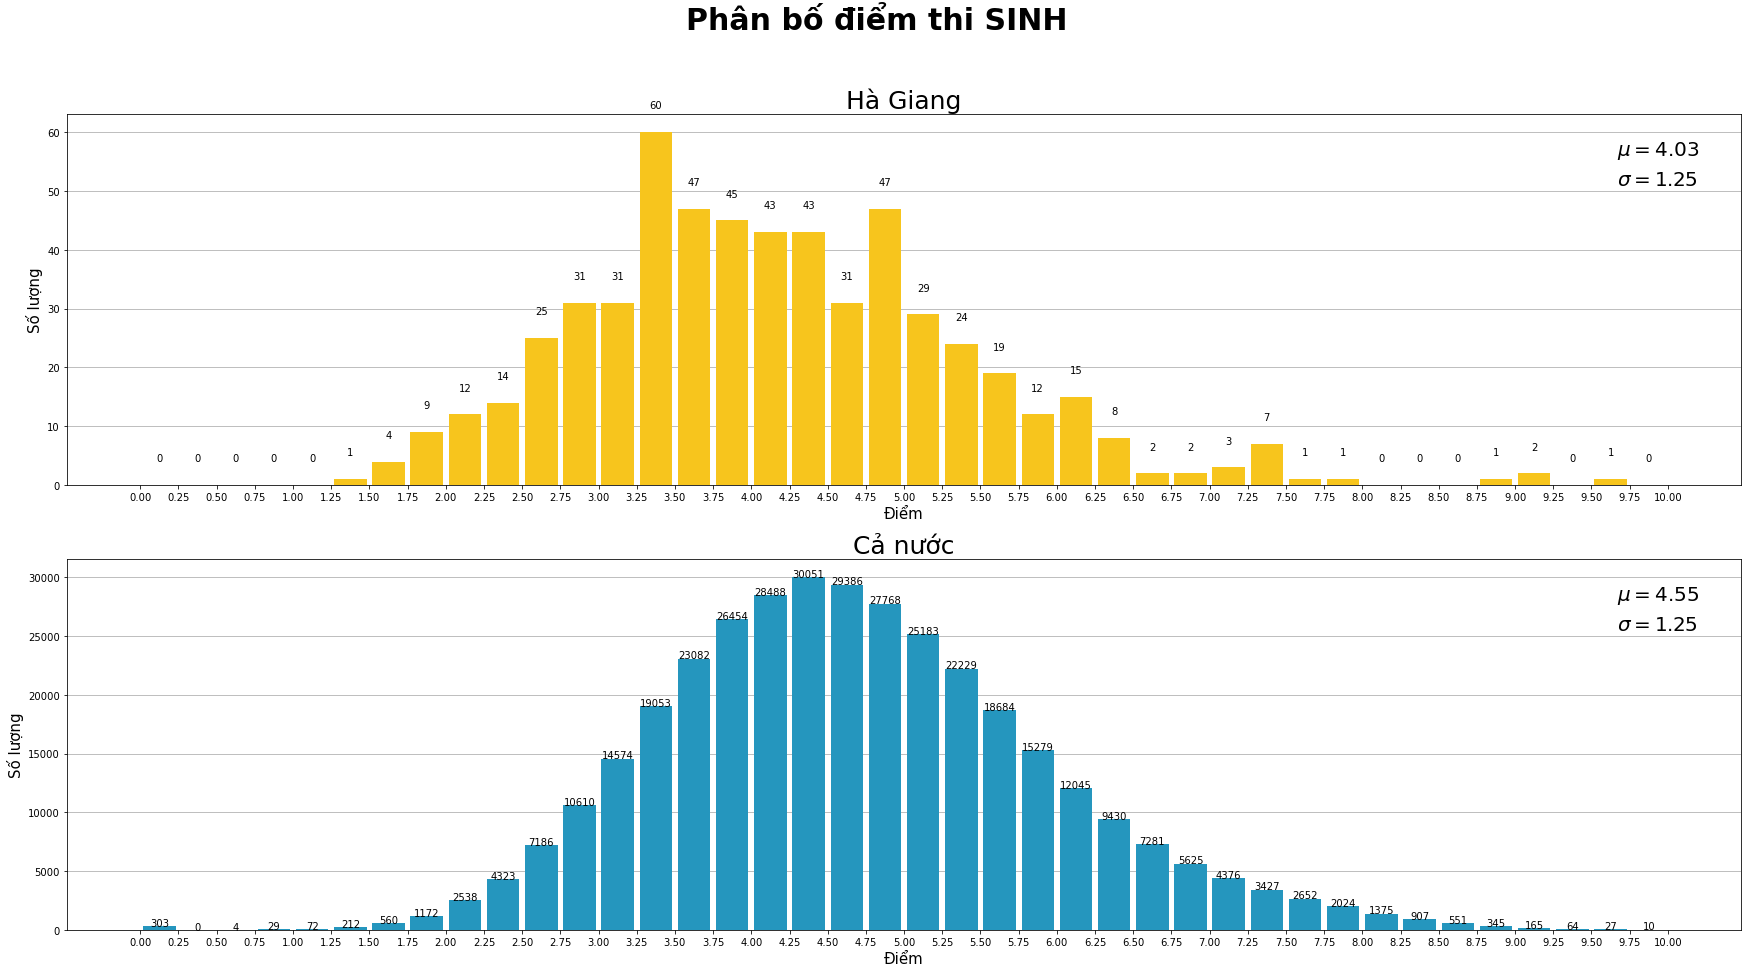

In [11]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SINH')

___Nhận xét:___
- Thông qua xem xét hình dáng phân phối điểm và so sánh với phổ điểm toàn quốc, không phát hiện bất thường trong điểm số môn Sinh học của tỉnh Hà Giang.

### Lịch sử

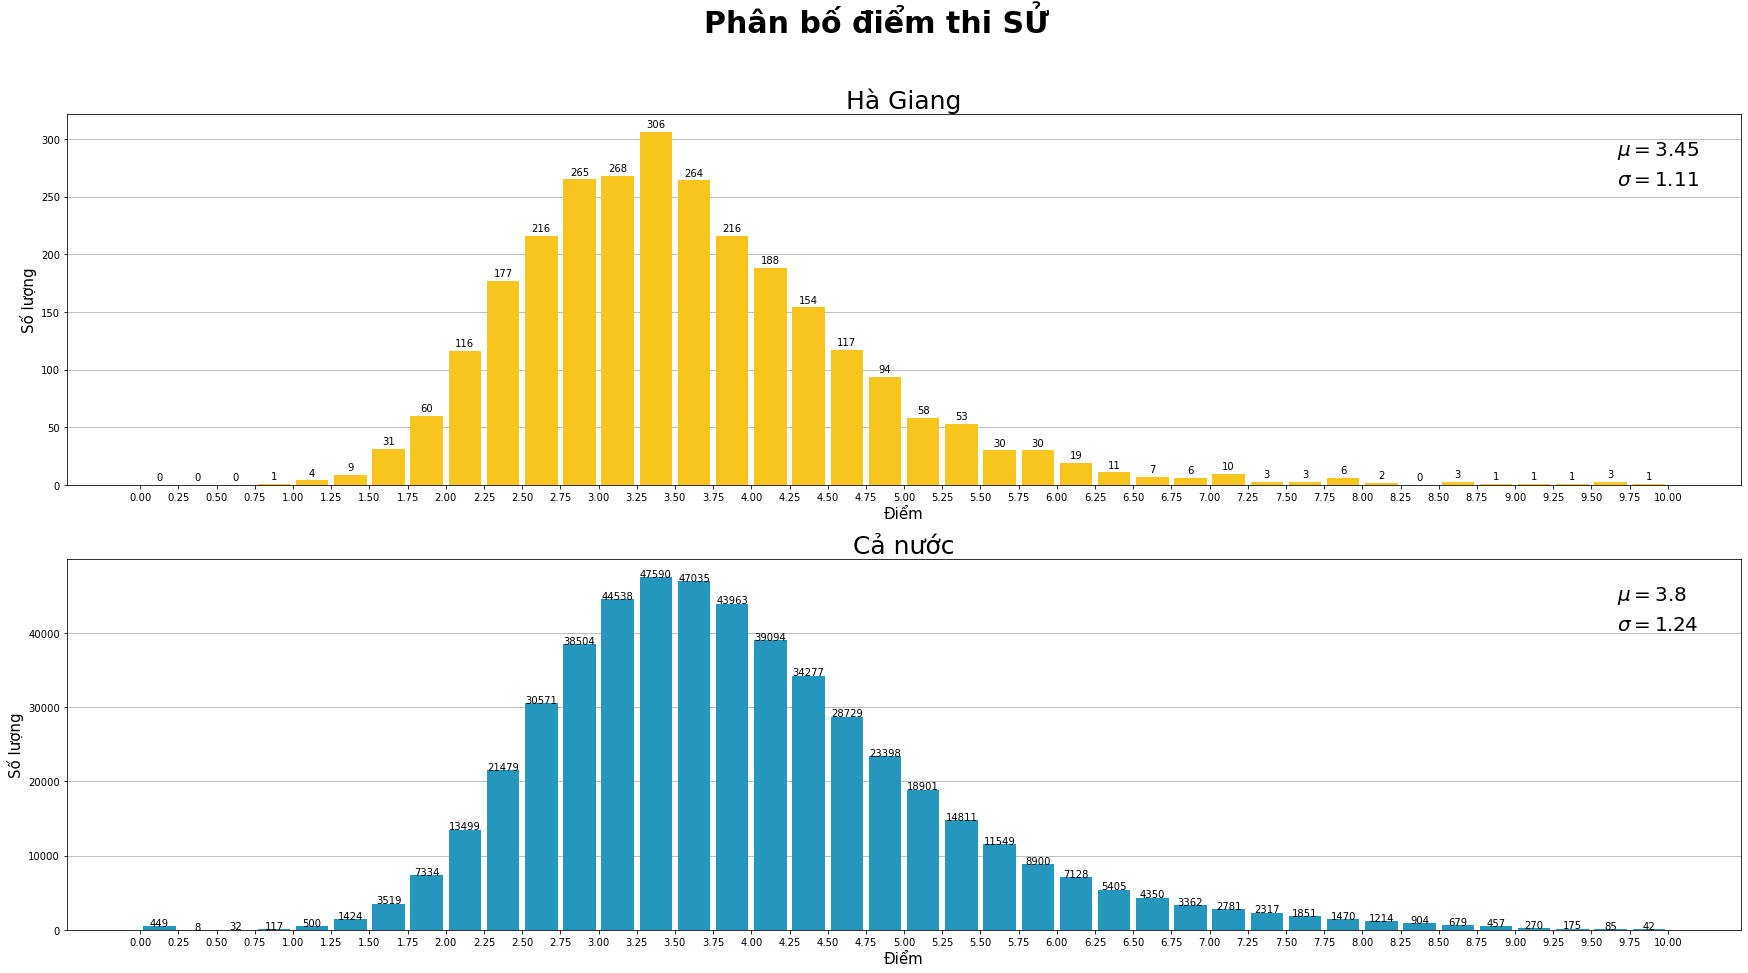

In [12]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SỬ')

___Nhận xét:___
- Phân bố điểm thi Lịch sử tuân theo phân phối chuẩn và không lệch so với cả nước. Do đó, có thể kết luận: Không có gì bất thường đối với điểm của môn thi này.

### Địa lý

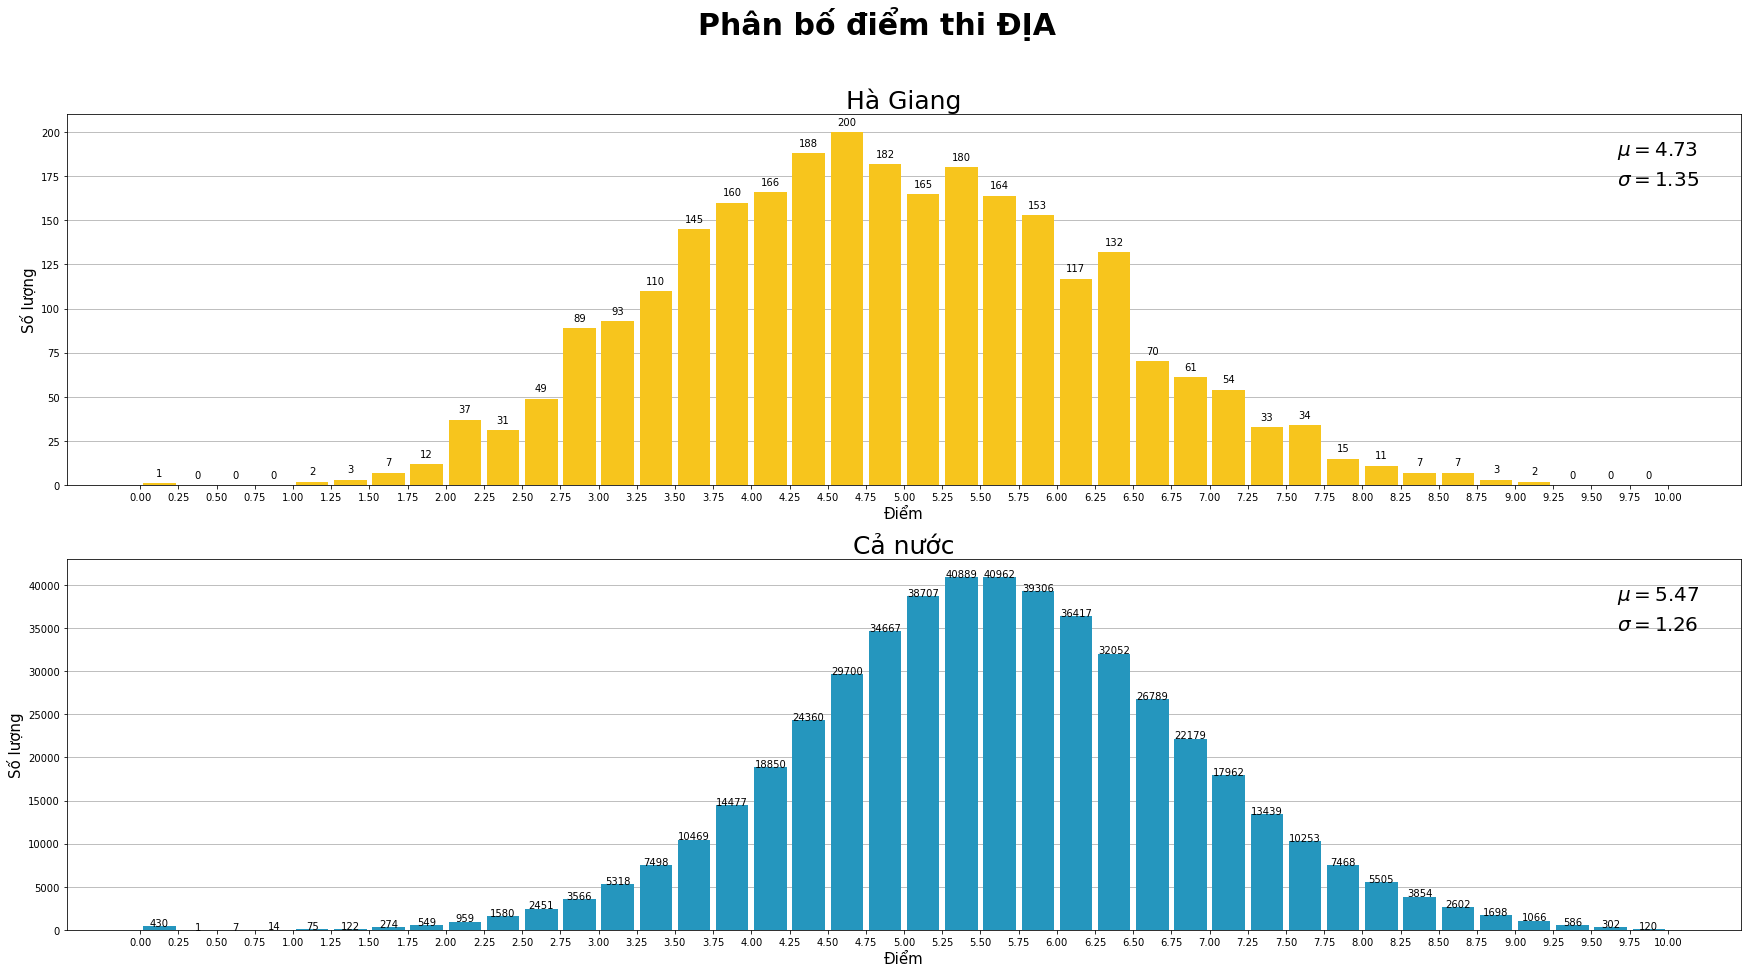

In [13]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ĐỊA')

___Nhận xét:___ 
- Phổ điểm môn Địa tuân theo phân phối chuẩn nhưng bị lệch trái so với phân bố điểm của cả nước. Dù vậy, cũng không đủ cơ sở để kết luận có điều gì bất thường đối với phổ điểm này.

### Giáo dục công dân

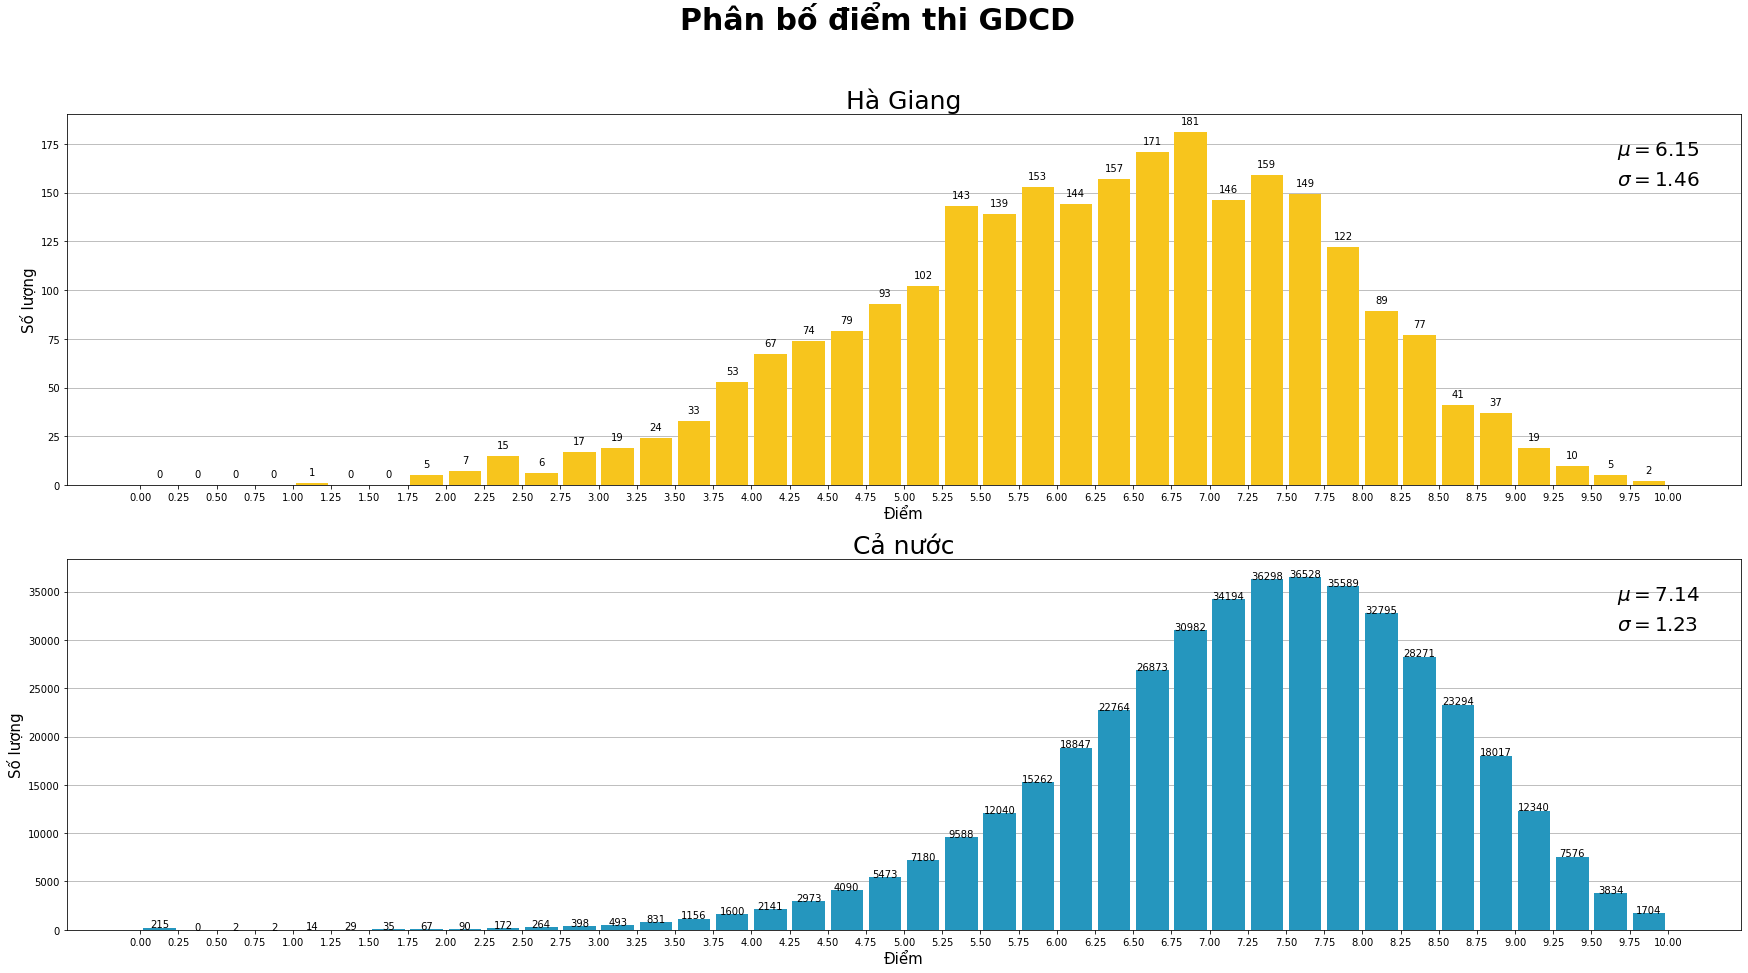

In [14]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'GDCD')

___Nhận xét:___
- Hình dáng phổ điểm so sánh với điểm toàn quốc khá tương đồng, không có dấu hiệu bất thường.

## Phân bố điểm thi các Khối thi
### Tự nhiên
#### Khối A

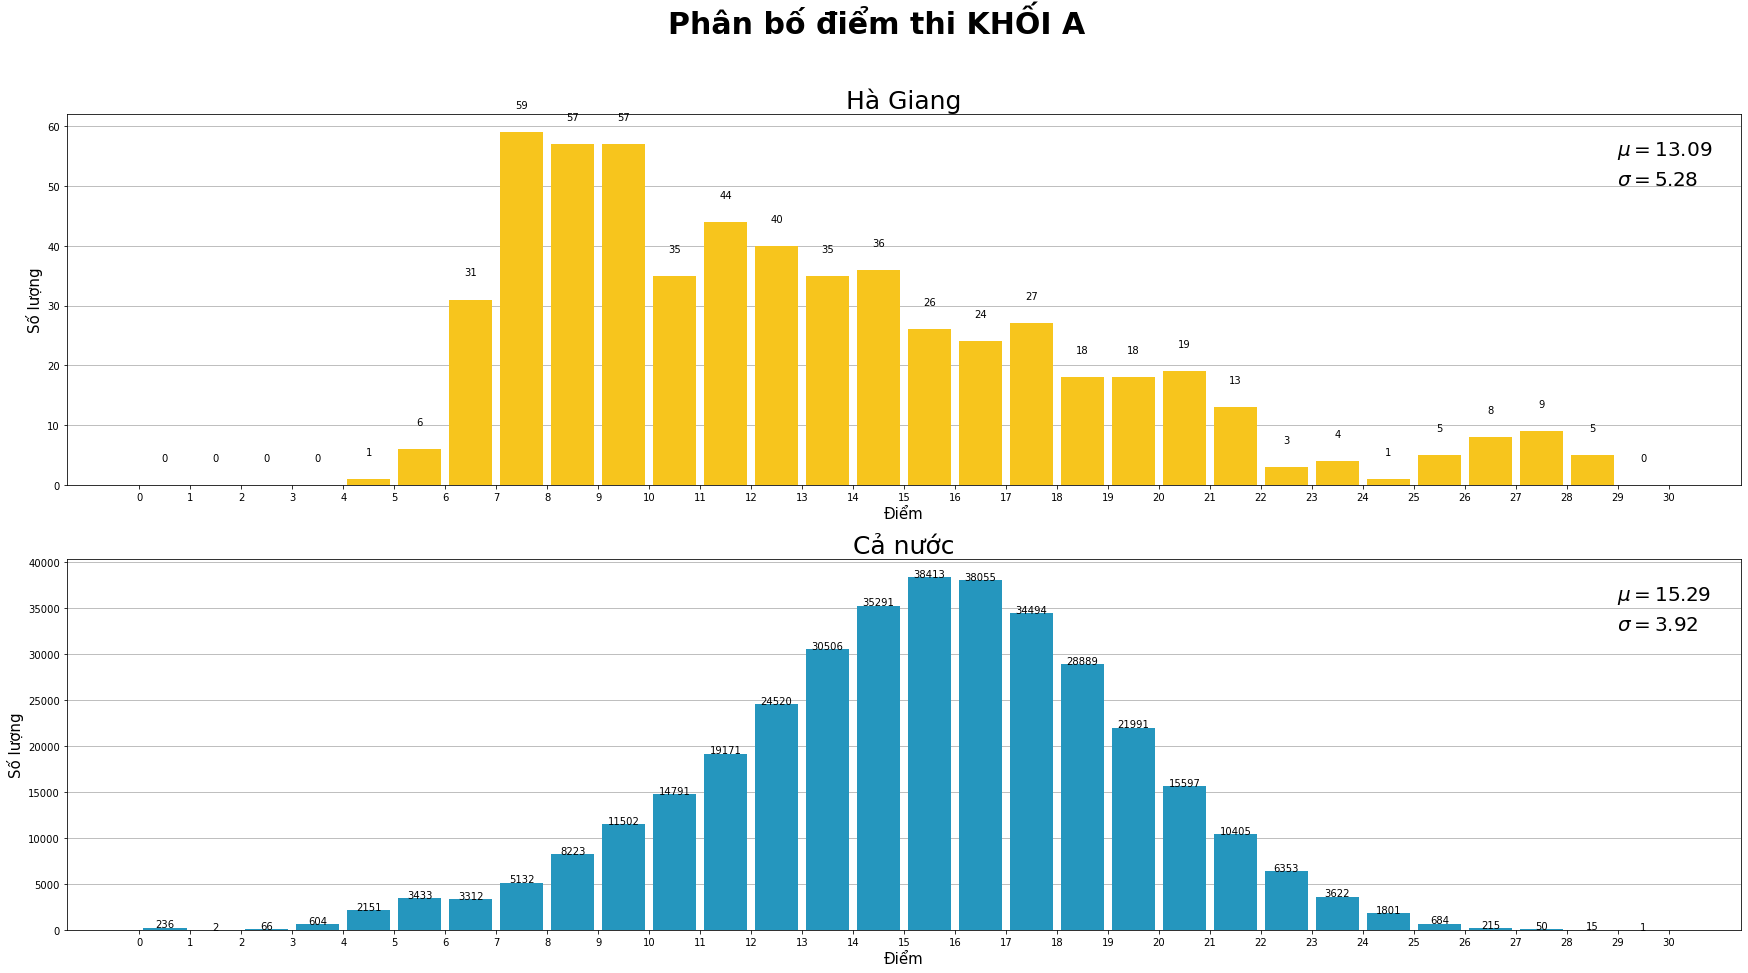

In [15]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A', num_bins= 30, x_range = (0, 30))

___Nhận xét:___ 
- Phân bố điểm thi khối A ở Hà Giang khác biệt so với cả nước
- Phân bố điểm khối A ở Hà Giang thấp hơn cả nước. Khoảng điểm phổ biến là 7-10 điểm, trong khi cả nước là 15-17 điểm.
- Số thí sinh đạt khoảng điểm 24-25 điểm chỉ có 1 nhưng số thí sinh đạt trên 25 điểm lại tăng cao bất thường (27 thí sinh).


#### Khối A1

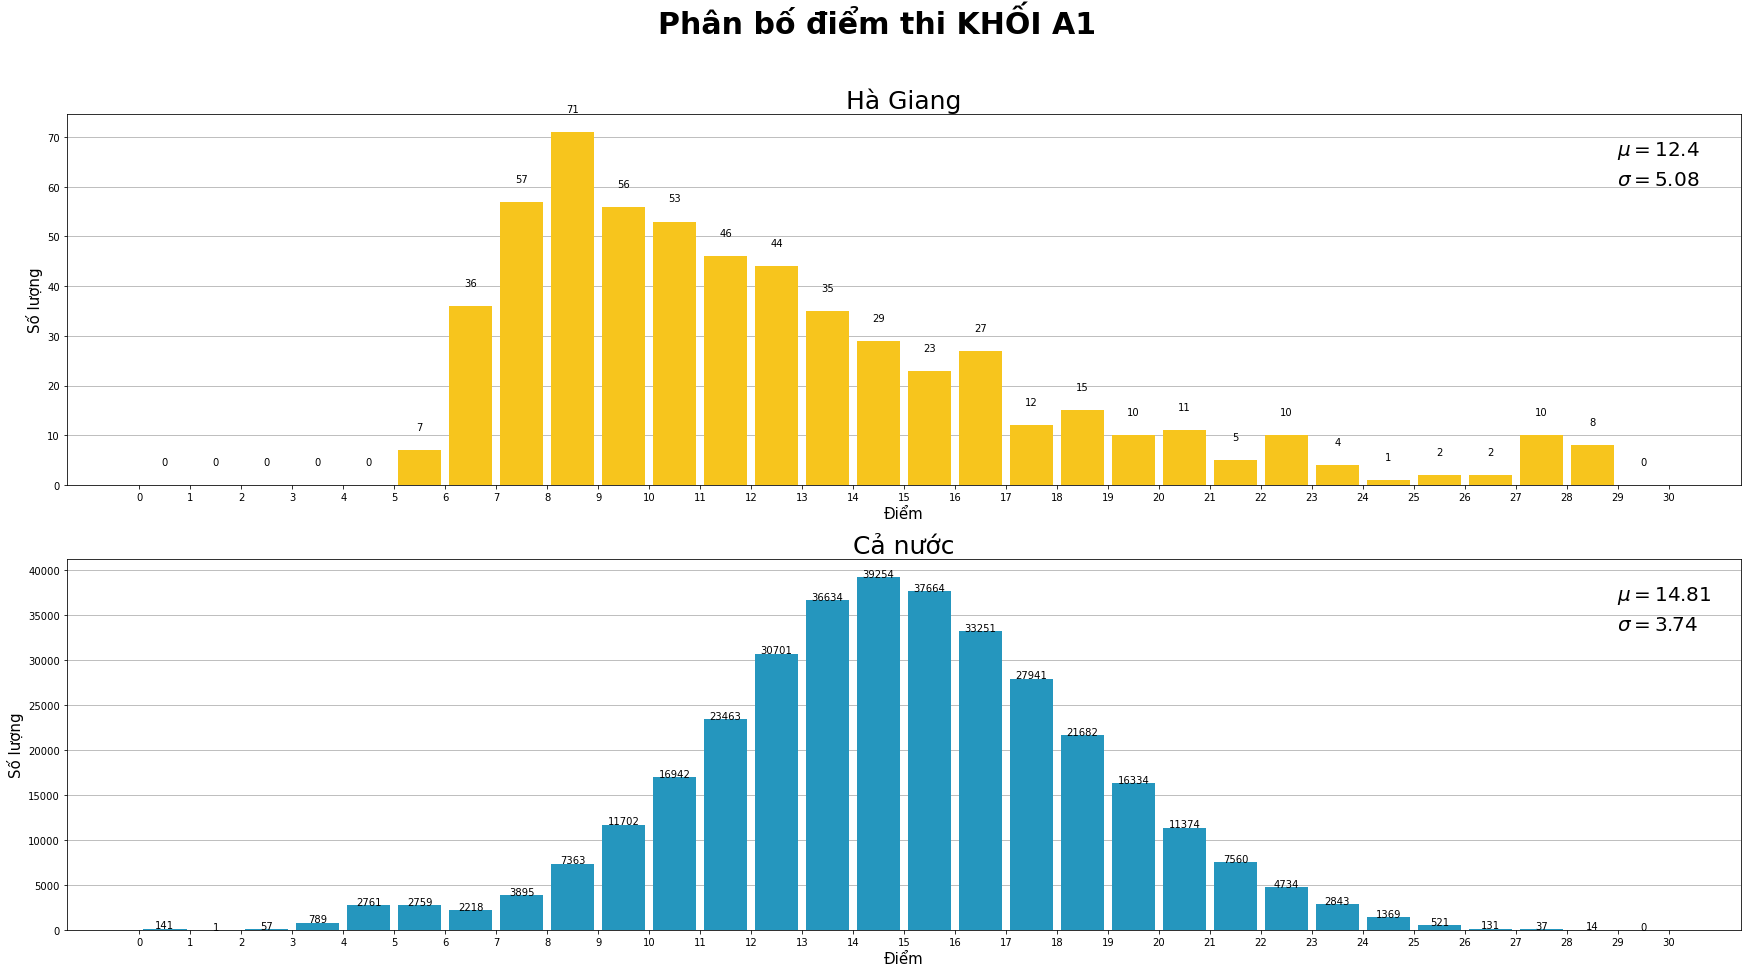

In [16]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A1', num_bins= 30, x_range = (0, 30))

___Nhận xét:___ 
- Phân bố điểm khối A1 ở Hà Giang khác biệt so với cả nước.
- Khoảng điểm phổ biến là 8-9 điểm, thấp hơn so với cả nước (14-15 điểm)

#### Khối B

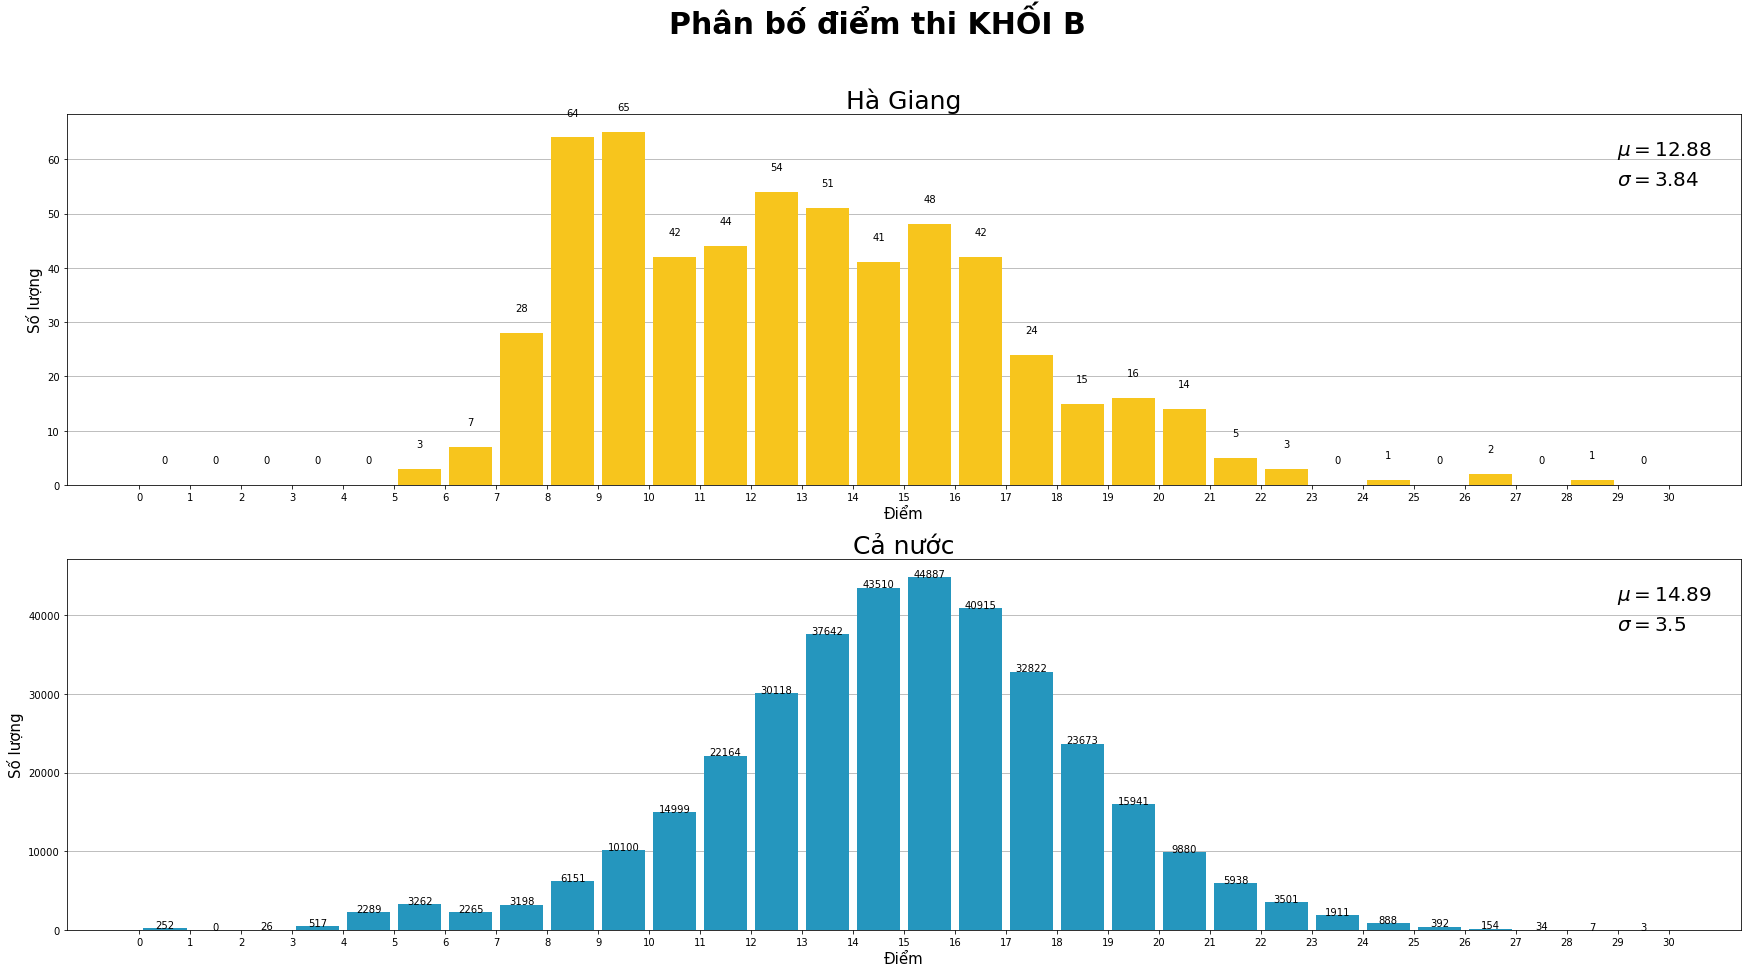

In [17]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI B', num_bins= 30, x_range = (0, 30))

___Nhận xét:___ 
- Phân bố điểm thi khối B ở Hà Giang khác biệt so với cả nước
- Phân bố điểm khối B ở Hà Giang thấp hơn cả nước. Khoảng điểm phổ biến là 7-10 điểm, trong khi cả nước là 15-17 điểm.
- Số thí sinh đạt khoảng điểm 24-25 điểm chỉ có 1 nhưng số thí sinh đạt trên 25 điểm lại tăng cao bất thường (27 thí sinh). 

### Xã hội
#### Khối C

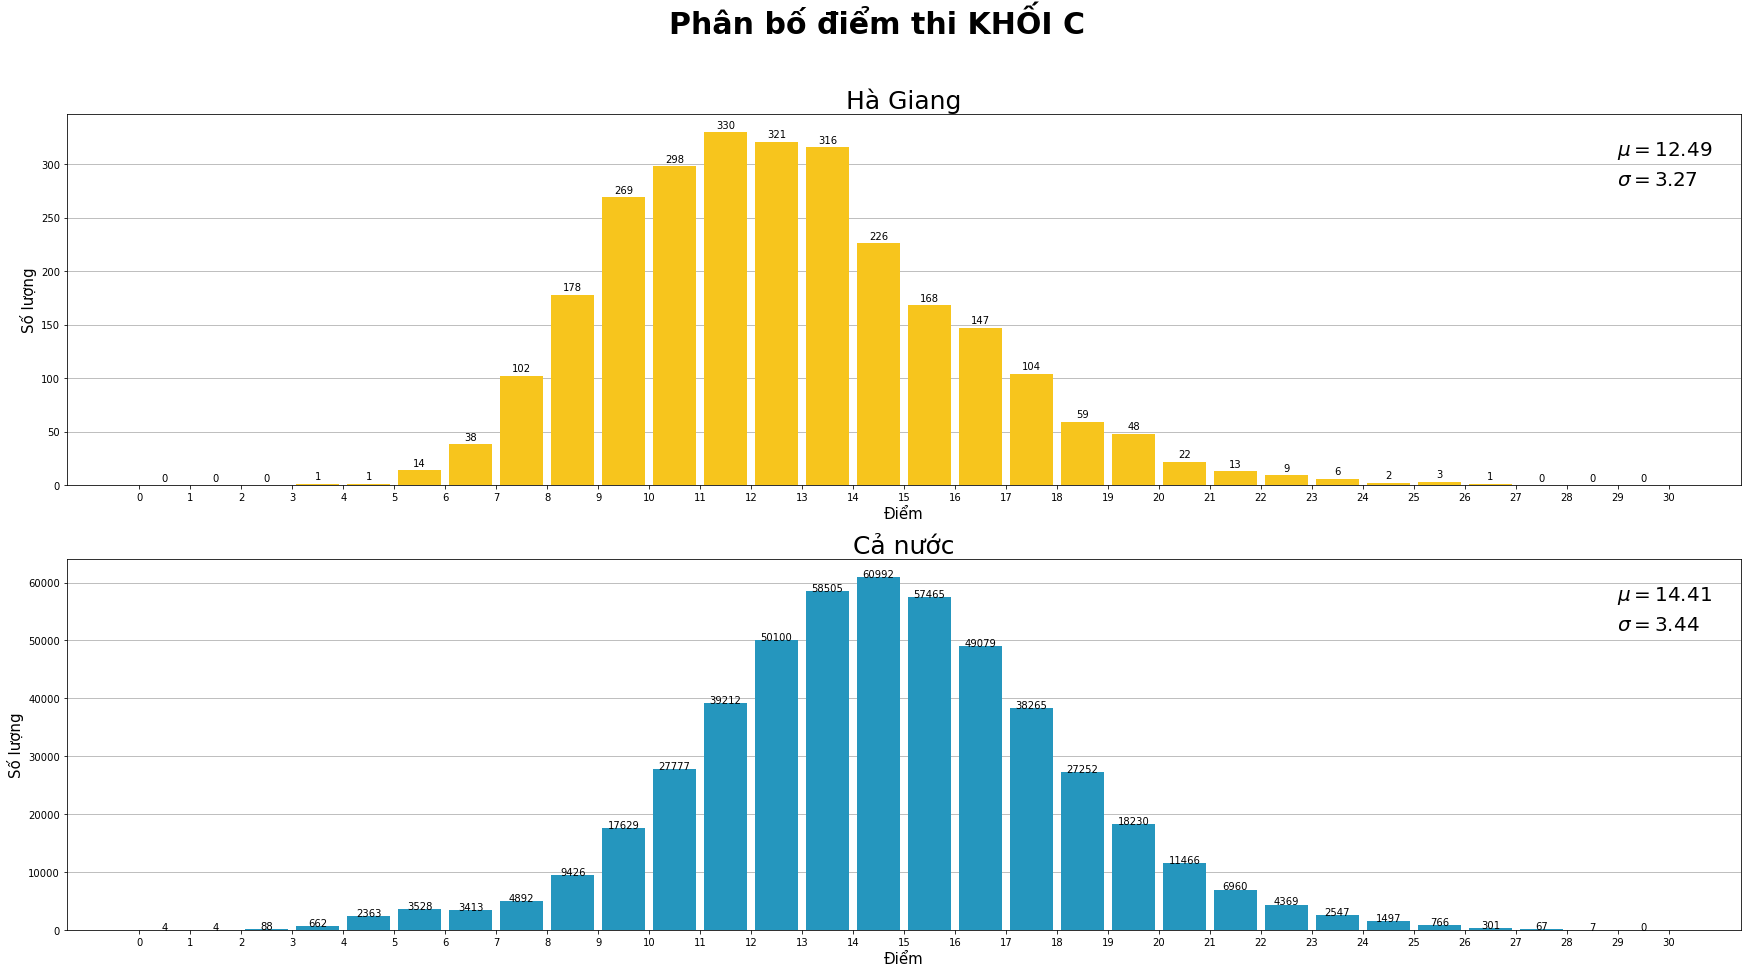

In [18]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI C', num_bins= 30, x_range = (0, 30))

___Nhận xét:___ 
- Phổ điểm khối C của tỉnh Hà Giang lệch trái (điểm trung bình thấp hơn 2 điểm) so với toàn quốc và tuân theo phân phối chuẩn. Xét theo khả năng học tập của các tỉnh miền núi phía Bắc, kết quả này là hơp lý. Do đó, có thể kết luận: Không có sự bất thường đối với phổ điểm này

#### Khối D

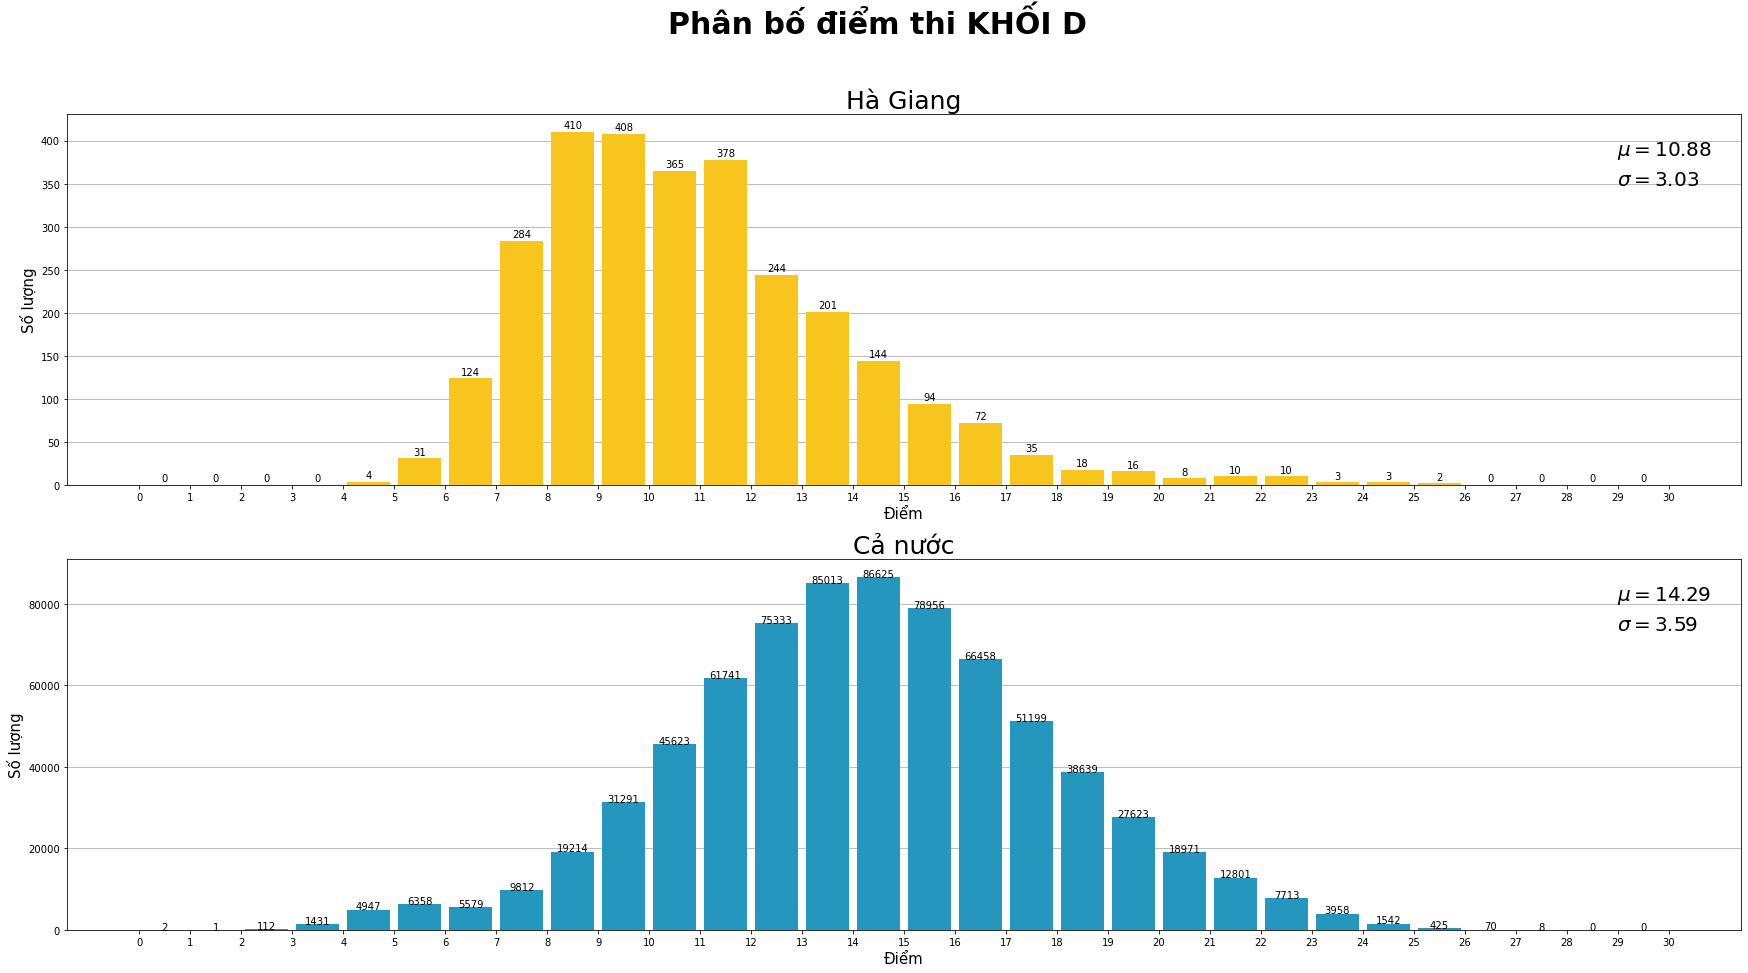

In [19]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI D', num_bins= 30, x_range = (0, 30))

___Nhận xét:___ 
- Phổ điểm khố D của tỉnh Hà Giang bị lệch trái khá nhiều (điểm trung bình thấp hơn gần 4 điểm) so với toàn quốc và tuân theo phân phối chuẩn. Xét theo khả năng học tập của các tỉnh miền núi phía Bắc, kết quả này là hơp lý. Do đó, có thể kết luận: Không có sự bất thường đối với phổ điểm này

## Tỉ lệ thí sinh > 27đ các khối thi

In [20]:
draw_pie_chart_compare()

___Nhận xét:___   
#### Khối A:  
- tỉ lệ số thí sinh đạt trên 27 điểm ở Hà Giang chỉ chiếm 2.27% so với cả nước, nhưng số thí sinh trên 28 điểm chiếm 1/3 cả nước cho thấy điểm bất thường trong phân phối điểm khối B ở Hà Giang.  
#### Khối A1:  
- Số thí sinh đạt khoảng điểm 24-27 điểm chỉ có 5 thí sinh. Tuy nhiên, số thí sinh đạt trên 27 điểm có 18 thí sinh, cao hơn 3 lần khoảng điểm 24-27 điểm. Theo như biểu đồ tròn, tỉ lệ thí sinh khối A1 đạt trên 27 điểm ở Hà Giang chiếm 35.3% so với cả nước nhưng khoảng điểm phổ biến lại thấp hơn. 
- Hơn nữa, số thí sinh đạt 28-29 điểm chiếm hơn một nửa cả nước. Đây là điểm bất thường của phân bố điểm ở Hà Giang.  
#### Khối B: 
- tỉ lệ số thí sinh đạt trên 27 điểm ở Hà Giang chỉ chiếm 2.27% so với cả nước, nhưng số thí sinh trên 28 điểm chiếm 1/3 cả nước cho thấy điểm bất thường trong phân phối điểm khối B ở Hà Giang.
#### Khối C: 
- Hà Giang không có 1 thí sinh nào đạt trên 27 điểm khối C. Theo quan sát phổ điểm từng môn Sử, Địa, Công dân, với số điểm trên 8 ít ỏi ở cả 3 môn của tình Hà Giang, điều này là hoàn toàn hợp lý.
#### Khối D: 
- Hà Giang không có 1 thí sinh nào đạt trên 27 điểm khối D. Theo quan sát phổ điểm từng môn Toán, Văn, Anh, với số điểm trên 8 ít ỏi ở môn Toán của tình Hà Giang cộng thêm số trung bình Anh văn chỉ có 2.97 điểm, điều này là hoàn toàn hợp lý.

## TỔNG QUÁT: 
- Dựa theo các nhận xét phân phối điểm của từng môn và từng khối ở Hà Giang so với phân phối điểm của cả nước, nhóm đã xác định được một số điểm bất thường trong phân phối điểm và số lượng thí sinh đạt trong từng khoảng điểm của các môn thi và các khối thi.
- Các môn thi xuất hiện điểm bất thường và có khả năng xảy ra gian lận ở Hà Giang: **Toán, Vật Lý, Hóa Học**.
- Các khối thi xuất hiện điểm bất thường và có khả năng xảy ra gian lận ở Hà Giang: **A, A1**.